This notebook uses logistic regression to predict the breast cancer that may be malignant denoted by M and benign denoted by B. It has 10 features and each feature has further 3 characterstics that are mean, standard error and "worst" or largest (mean of the three largest values).

These 10 features for each cell nucleus are:

1. radius (mean of distances from center to points on the perimeter)

2. texture (standard deviation of gray-scale values)

3. perimeter

4. area

5. smoothness (local variation in radius lengths)

6. compactness (perimeter^2 / area - 1.0)

7. concavity (severity of concave portions of the contour)

8. concave points (number of concave portions of the contour)

9. symmetry

10. fractal dimension (coastline approximation - 1)

Dataset source: Kaggle

# Import Library

 The 'Pandas' package is a fast, flexible tool used to analyze data. It helps in reading and updating the files like csv files, excel, etc.

In [1]:
import pandas as pd

# Import data

Dataset is imported from github in raw form.

In [6]:
data = pd.read_csv('https://github.com/Muskan2320/Regression/raw/main/Breast%20Cancer%20Prediction/Cancer%20Prediction.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


import numpy as np
from google.colab import autoviz
df_2016454064740233128 = autoviz.get_df('df_2016454064740233128')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2016454064740233128, *['id'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4525498208710022169 = autoviz.get_df('df_4525498208710022169')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4525498208710022169, *['radius_mean'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1364956916021408244 = autoviz.get_df('df_1364956916021408244')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1364956916021408244, *['texture_mean'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3538558131461693204 = autoviz.get_df('df_3538558131461693204')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3538558131461693204, *['perimeter_mean'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4086308992461492191 = autoviz.get_df('df_4086308992461492191')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4086308992461492191, *['id'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7959950343500178057 = autoviz.get_df('df_7959950343500178057')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7959950343500178057, *['radius_mean'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1129444472086334297 = autoviz.get_df('df_1129444472086334297')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1129444472086334297, *['texture_mean'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4170054529709674749 = autoviz.get_df('df_4170054529709674749')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4170054529709674749, *['perimeter_mean'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4820087288076552989 = autoviz.get_df('df_4820087288076552989')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_4820087288076552989, *[[['id', 'radius_mean'], ['radius_mean', 'texture_mean'], ['texture_mean', 'perimeter_mean'], ['perimeter_mean', 'area_mean']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_393999361914355866 = autoviz.get_df('df_393999361914355866')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_393999361914355866, *['id', 'radius_mean', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_8261483974198729307 = autoviz.get_df('df_8261483974198729307')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_8261483974198729307, *['id', 'texture_mean', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_2624579770714288306 = autoviz.get_df('df_2624579770714288306')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_2624579770714288306, *['id', 'perimeter_mean', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_1666852422052044452 = autoviz.get_df('df_1666852422052044452')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_1666852422052044452, *['id', 'area_mean', None], **{})
chart

# Define dependent and independent variables

In [41]:
data.columns                                                          # Returns the name of columns

X = data.drop(['id', 'Unnamed: 32', 'diagnosis'], axis = 1)           # axis = 1 means it drops the column
Y = data['diagnosis']

# Split training and test data

In [55]:
from sklearn.model_selection import train_test_split

# Specifying the train size to 0.75 means splitting the data in 75% train data and 25% test data. It can also be done using test_size = 0.25
# Specifying the random_state means specifying the seed as row are assigned to train and test set randomly.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.75, random_state = 100)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((426, 30), (143, 30), (426,), (143,))

# Select Model

We are using logistic regression for prediction.

This type of statistical model (also known as logit model) is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring.

In [56]:
from sklearn.linear_model import LogisticRegression

# We specify the number of iterations it requires to create a best classifier possible. If it gives warning then increase the nuber of iterations.
model = LogisticRegression(max_iter = 3000)
model.fit(X_train, Y_train)                       # Fitting the data to model means model is learning patterns from training set

LogisticRegression(max_iter=3000)

# Model prediction on test data

In [57]:
y_pred = model.predict(X_test)

# Model Accuracy

As logistic regression is used for classification purpose hence, the accuracy measures are accuracy score and confusion matrix.

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

print("Accuracy score:", accuracy_score(Y_test, y_pred))

Accuracy score: 0.965034965034965


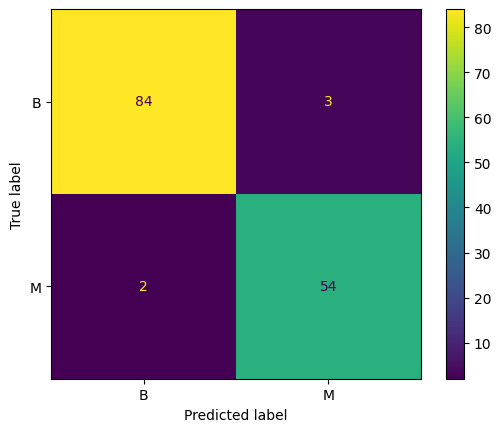

In [61]:
import matplotlib.pyplot as plt

matrix = confusion_matrix(Y_test, y_pred)                              # It creates the confusion matrix
p =  ConfusionMatrixDisplay(matrix, display_labels = ['B','M'])        # It displays the confusion matrix. Lables ust be in alphabetical order
p.plot()

In [60]:
# It displays the precision, recall, f1-score.

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           B       0.98      0.97      0.97        87
           M       0.95      0.96      0.96        56

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143

